In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

In [2]:
"""
## **Evaluating the k-NN Algorithm**

Defining some functions to make life easier later
"""

#Calculates the euclidean distance between two points
def euc_dist(arr1: np.ndarray, arr2: np.ndarray):
    return np.sqrt(np.sum((arr1 - arr2) ** 2))


#Calculates the mojority class that appears given a list of labels
def majority(labels: np.ndarray) -> str:
    d = {}
    for label in labels:
        if label not in d:
            d[label] = 1
        else:
            d[label] += 1

    return max(d, key=d.get)


#Normalizes the features (used in the normalize method of KNN)
def normalize_df(features):
    max_vals = features.max()
    min_vals = features.min()

    for c in range(len(features.columns)):
        features.iloc[:, c] = (features.iloc[:, c] - min_vals[c]) / (max_vals[c] - min_vals[c])

    return features

In [3]:
"""**The KNN class**"""

class KnnTrain:
    def __init__(self, k) -> None:
        self.k = k

    def train(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train

    def normalize(self):
        self.x_train = normalize_df(self.x_train)

    def predict(self, features):

        preds = []
        for i in range(len(features)):
            dists = np.array([euc_dist(features[i], self.x_train.to_numpy()[j]) for j in range(len(self.x_train.to_numpy()))])

            closest_inds = np.argsort(dists)[: self.k]
            closest_labels = np.array([self.y_train.to_numpy()[ind] for ind in closest_inds])
            majority_label = majority(closest_labels)
            preds.append(majority_label)

        return np.array(preds)

    def accuracy(self, actual, preds):
        return (np.sum(preds == actual) / len(actual)) * 100

In [4]:
"""**Training the KNN model 20 times for each value of `k` (on training data)**"""

df = pd.read_csv("iris.csv")

#Arrays that store the average accuracies for each value of K
train_avg_accuracy = np.zeros(26)
test_avg_accuracy = np.zeros(26)
train_std_deviation = np.zeros(26)
test_std_deviation = np.zeros(26)

# Calculating average training accuracy and average testing accuracy of the model for different values of k.
for k in range(1, 52, 2):
    train_acc = np.zeros(20)
    test_acc = np.zeros(20)

    # Repeats the training process for a single value of k, for 20 times, each time randomly shuffling the dataset and randomly splitting.
    for i in range(20):

        #Shuffling and splitting the dataset into training and testing sets
        df = sklearn.utils.shuffle(df)
        train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
        x_train = train_df.iloc[:, :4]
        y_train = train_df.iloc[:, 4]
        x_test = test_df.iloc[:, :4]
        y_test = test_df.iloc[:, 4]

        #Training the model on training data
        train_model = KnnTrain(k)
        train_model.train(x_train, y_train)
        train_model.normalize()
        train_preds = train_model.predict(train_model.x_train.to_numpy())
        train_acc[i] = train_model.accuracy(train_model.y_train.to_numpy(), train_preds)

        test_preds = train_model.predict(normalize_df(x_test).to_numpy())
        test_acc[i] = train_model.accuracy(y_test.to_numpy(), test_preds)

    train_avg_accuracy[k // 2] = train_acc.mean()  # Calculating average training accuracy for a specific value of k
    train_std_deviation[k // 2] = np.std(train_acc)
    test_avg_accuracy[k // 2] = test_acc.mean()  # Calculating average testing accuracy for a specific value of k
    test_std_deviation[k // 2] = np.std(test_acc)

x_vals = np.array([i for i in range(1, 52, 2)])

C:\Users\Adity\AppData\Local\Temp\ipykernel_43456\596044852.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  features.iloc[:, c] = (features.iloc[:, c] - min_vals[c]) / (max_vals[c] - min_vals[c])


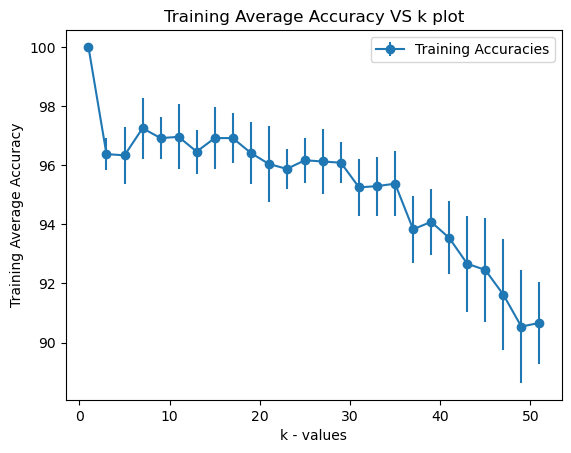

In [5]:
"""### Q1.1"""

plt.figure()
plt.errorbar(x_vals,train_avg_accuracy,yerr=train_std_deviation,label="Training Accuracies",fmt="-o",)
plt.xlabel("k - values")
plt.ylabel("Training Average Accuracy")
plt.title("Training Average Accuracy VS k plot")
plt.legend()
plt.savefig("Q1-1.png")
plt.show()

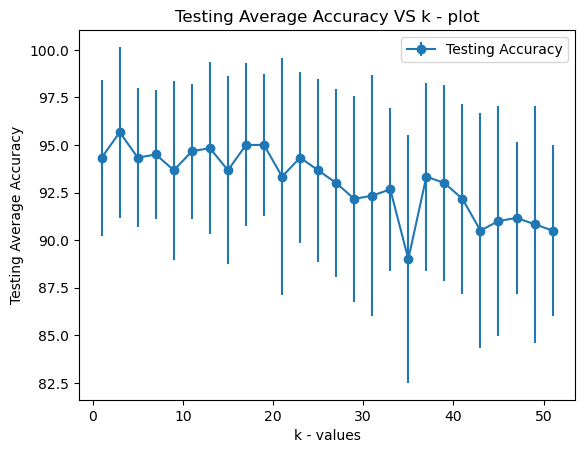

In [6]:
"""### Q1.2"""

plt.figure()
plt.errorbar(x_vals, test_avg_accuracy, yerr=test_std_deviation, label="Testing Accuracy", fmt="-o")
plt.xlabel("k - values")
plt.ylabel("Testing Average Accuracy")
plt.title("Testing Average Accuracy VS k - plot")
plt.legend()
plt.savefig("Q1-2.png")
plt.show()

In [ ]:
"""
### Q1.6
**(No normalization)**
"""

df = pd.read_csv("iris.csv")

#Arrays that store the average accuracies for each value of K
# train_avg_accuracy = np.zeros(26)
test_avg_accuracy = np.zeros(26)
# train_std_deviation = np.zeros(26)
test_std_deviation = np.zeros(26)

# Calculating average training accuracy and average testing accuracy of the model for different values of k.
for k in range(1, 52, 2):
    # train_acc = np.zeros(20)
    test_acc = np.zeros(20)

    # Repeats the training process for a single value of k, for 20 times, each time randomly shuffling the dataset and randomly splitting.
    for i in range(20):

        #Shuffling and splitting the dataset into training and testing sets
        df = sklearn.utils.shuffle(df)
        train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
        x_train = train_df.iloc[:, :4]
        y_train = train_df.iloc[:, 4]
        x_test = test_df.iloc[:, :4]
        y_test = test_df.iloc[:, 4]

        # #Training the model on training data
        # train_model = KnnTrain(k)
        # train_model.train(x_train, y_train)
        # train_model.normalize()
        # train_preds = train_model.predict(train_model.x_train.to_numpy())
        # train_acc[i] = train_model.accuracy(train_model.y_train.to_numpy(), train_preds)

        #Training the model on testing data
        test_model = KnnTrain(k)
        test_model.train(x_train, y_train)
        # test_model.normalize()
        test_preds = test_model.predict(x_test.to_numpy())
        test_acc[i] = test_model.accuracy(y_test.to_numpy(), test_preds)

    # train_avg_accuracy[k // 2] = train_acc.mean()  # Calculating average training accuracy for a specific value of k
    # train_std_deviation[k // 2] = np.std(train_acc)
    test_avg_accuracy[k // 2] = test_acc.mean()  # Calculating average testing accuracy for a specific value of k
    test_std_deviation[k // 2] = np.std(test_acc)

x_vals = np.array([i for i in range(1, 52, 2)])

plt.figure()
plt.errorbar(x_vals, test_avg_accuracy, yerr=test_std_deviation, label="Testing Accuracy", fmt="-o")
plt.xlabel("k - values")
plt.ylabel("Testing Average Accuracy")
plt.title("Testing Average Accuracy VS k - plot (without normalization)")
plt.legend()
plt.savefig("Q1-6.png")
plt.show()

In [3]:
"""
## **Evaluating the Decision Tree Algorithm**

Defining some functions again to make life easier later
"""

def gini(labels: np.ndarray):
    gini_val = 0
    label_freq = {}
    for i in labels:
        if i in label_freq: label_freq[i] += 1
        else: label_freq[i] = 1

    for i in label_freq:
        gini_val += (label_freq[i] / len(labels)) ** 2

    return 1 - gini_val

def entropy(labels: np.ndarray):
    entropy_val = 0
    if len(labels) == 0:
        return 0
    label_freq = {0:0, 1:0}
    for i in labels:
        label_freq[i] += 1
    for i in label_freq:
        prob = label_freq[i] / len(labels)
        if prob == 0:
            continue
        else:entropy_val += -((prob) * np.log2(prob))


    return entropy_val

def info_gain(par, left, right, func=entropy):
    return func(par) - (((len(left) / len(par)) * func(left)) + ((len(right) / len(par)) * func(right)))


# def info_gain(par, left, middle, right, func=entropy):
#     return func(par) - (((len(left) / len(par)) * func(left)) + ((len(right) / len(par)) * func(right)) + ((len(middle)/len(par))*func(middle)))


In [64]:
"""**The Decision Tree (and its Node) class**"""

class Node:
    def __init__(self, feature=None, left=None, right=None, value=None, ig=None, threshold=None) -> None:
        self.feature = feature
        self.left = left
        self.right = right
        # self.ig = ig #information gain
        self.value = value
        self.threshold = threshold

class DT:
    def __init__(self, train_arr, func) -> None:
        self.train_arr = train_arr
        self.func = func

    def fit(self):
        x_train = self.train_arr[:, :16]
        y_train = self.train_arr[:, 16]
        feats_to_split = set([i for i in range(16)])
        self.tree = self.build(x_train, y_train, feats_to_split)

    def best_split(self, x_train, y_train, feats_to_split):
        best_info_val = 0
        best_feature_ind = None
        best_threshold = None
        curr_info_val = 0
        for feature in feats_to_split:
            for threshold in np.unique(x_train[:, feature]):
                left_ind, right_ind = x_train[:, feature] < threshold, x_train[:, feature] >= threshold
                left, right = y_train[left_ind], y_train[right_ind]
                curr_info_val = info_gain(y_train, left, right, self.func)
                if curr_info_val >= best_info_val:
                    best_info_val = curr_info_val
                    best_feature_ind = feature
                    best_threshold = threshold
        return best_feature_ind, best_threshold

    def build(self, x_train, y_train, feats_to_split, prev_y_train=None):
        samples_count = len(x_train)
        if samples_count == 0:
            return Node(value=np.argmax(np.bincount(prev_y_train)))

        if len(set(y_train)) == 1:
            return Node(value=y_train[0])
        
        label_freqs = np.array(np.bincount(y_train))
        major_class = np.argmax(label_freqs)

        if len(feats_to_split) == 0:
            feats_to_split = set([i for i in range(16)])

        best_feature_ind, best_threshold = self.best_split(x_train, y_train, feats_to_split)
        if best_feature_ind == None:
            return Node(value=major_class)

        feats_to_split = feats_to_split.copy()
        feats_to_split.remove(best_feature_ind)
        left_inds = x_train[:, best_feature_ind] < best_threshold
        right_inds = x_train[:, best_feature_ind] >= best_threshold
        prev_y_train = y_train
        if len(left_inds) > 0:
            left_tree = self.build(x_train[left_inds], y_train[left_inds], feats_to_split, y_train)
        else:
            left_tree = None
        if len(right_inds) > 0:
            right_tree = self.build(x_train[right_inds], y_train[right_inds], feats_to_split, y_train)
        else:
            right_tree = None
        return Node(feature=best_feature_ind, left=left_tree, right=right_tree, threshold=best_threshold)

    def predict_helper(self, x_input, node:Node):
        if node.value is not None:
            return node.value
        if x_input[node.feature] < node.threshold:
            return self.predict_helper(x_input, node.left)
        if x_input[node.feature] >= node.threshold:
            return self.predict_helper(x_input, node.right)

    def predict(self, x_train):
        return np.array([self.predict_helper(x_input, self.tree) for x_input in x_train])

    def accuracy(self, actual, preds):
        return (np.sum(actual == preds) / len(actual)) * 100




In [81]:
"""Training the model"""

df = pd.read_csv('house_votes_84.csv')

train_acc = np.zeros(100)
test_acc = np.zeros(100)
for i in range(100):
    df = sklearn.utils.shuffle(df)
    train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
    x_train = train_df.iloc[:, :16].to_numpy()
    y_train = train_df.iloc[:, 16].to_numpy()
    x_test = test_df.iloc[:, :16].to_numpy()
    y_test = test_df.iloc[:, 16].to_numpy()
    train_arr = train_df.to_numpy()
    test_arr = test_df.to_numpy()

    model = DT(train_arr, entropy)
    model.fit()
    train_preds = model.predict(x_train)
    train_acc[i] = model.accuracy(y_train, train_preds)

    test_preds = model.predict(x_test)
    test_acc[i] = model.accuracy(y_test, test_preds)

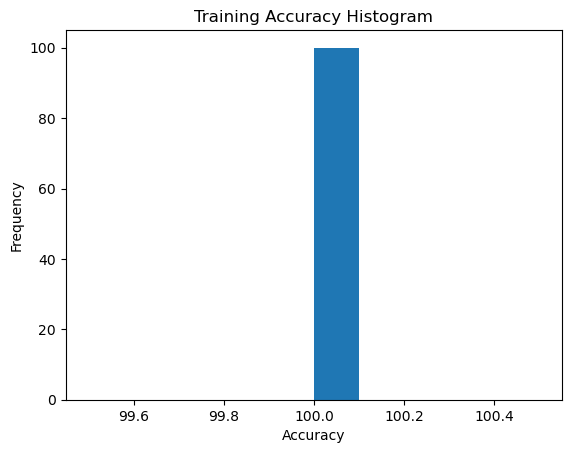

Mean accuracy = 100.0, Std deviation = 0.0


In [82]:
"""### Q2.1"""

plt.hist(train_acc)
plt.title("Training Accuracy Histogram")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
# plt.savefig('Q2-1.png')
plt.show()

print(f'Mean accuracy = {np.mean(train_acc)}, Std deviation = {np.std(np.std(train_acc))}')

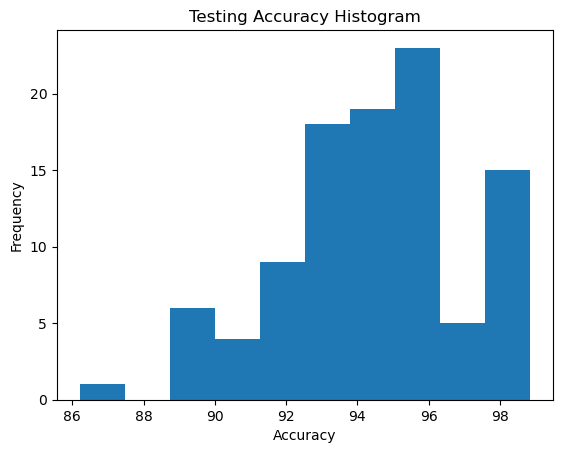

Mean accuracy = 94.29885057471263, Std deviation = 2.432440288075641


In [83]:
"""### Q2.2"""

plt.hist(test_acc)
plt.title("Testing Accuracy Histogram")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
# plt.savefig('Q2-2.png')
plt.show()

print(f'Mean accuracy = {np.mean(test_acc)}, Std deviation = {np.std(test_acc)}')

In [76]:
"""
Training the model
"""

df = pd.read_csv('house_votes_84.csv')

train_acc = np.zeros(100)
test_acc = np.zeros(100)
for i in range(100):
    df = sklearn.utils.shuffle(df)
    train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
    x_train = train_df.iloc[:, :16].to_numpy()
    y_train = train_df.iloc[:, 16].to_numpy()
    x_test = test_df.iloc[:, :16].to_numpy()
    y_test = test_df.iloc[:, 16].to_numpy()
    train_arr = train_df.to_numpy()
    test_arr = test_df.to_numpy()

    model = DT(train_arr, gini)
    model.fit()
    train_preds = model.predict(x_train)
    train_acc[i] = model.accuracy(y_train, train_preds)

    test_preds = model.predict(x_test)
    test_acc[i] = model.accuracy(y_test, test_preds)

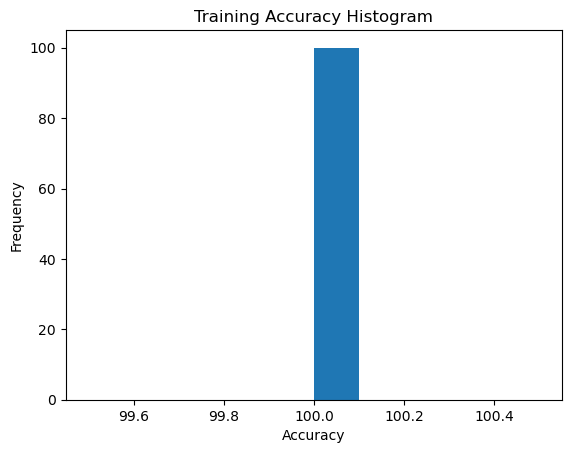

Mean accuracy = 100.0, Std deviation = 0.0


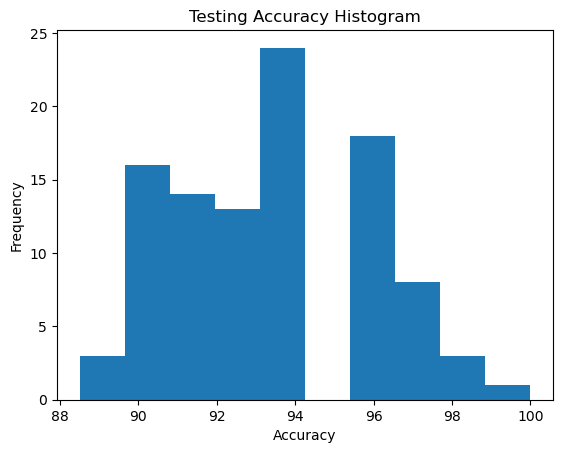

Mean accuracy = 93.52873563218392, Std deviation = 2.2968669602890084


In [77]:
"""**Training accuracy with gini**"""

plt.hist(train_acc)
plt.title("Training Accuracy Histogram")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.savefig('QE1 Training Gini.png')
plt.show()

print(f'Mean accuracy = {np.mean(train_acc)}, Std deviation = {np.std(train_acc)}')

"""**Testing accuracy with gini**"""

plt.hist(test_acc)
plt.title("Testing Accuracy Histogram")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.savefig('QE1 Testing Gini.png')
plt.show()

print(f'Mean accuracy = {np.mean(test_acc)}, Std deviation = {np.std(test_acc)}')

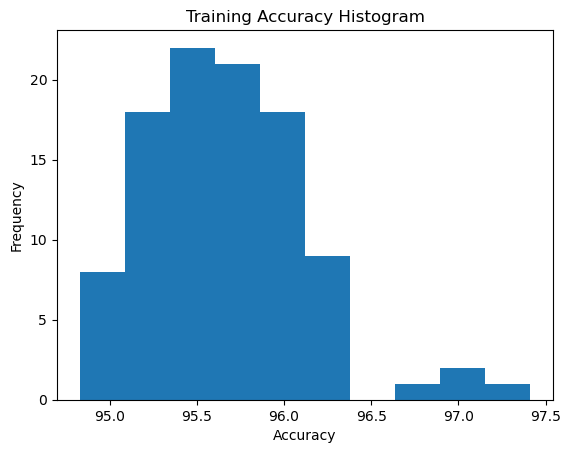

Mean accuracy = 95.61494252873561, Std deviation = 0.5102011291946245


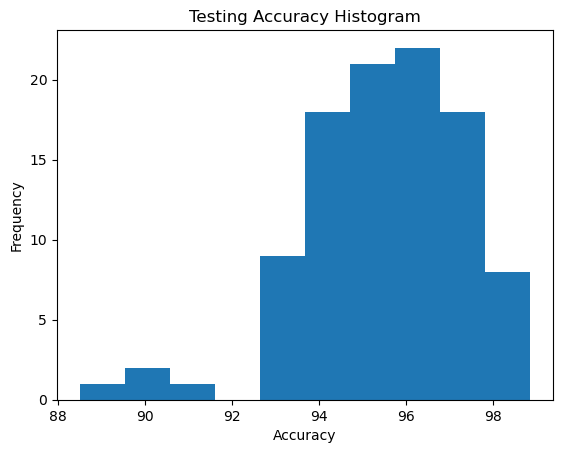

Mean accuracy = 95.70114942528737, Std deviation = 2.0408045167785


In [96]:
"""**The Decision Tree (and its Node) class**"""

class Node:
    def __init__(self, feature=None, left=None, right=None, value=None, ig=None, threshold=None):
        self.feature = feature
        self.left = left
        self.right = right
        # self.ig = ig #information gain
        self.value = value
        self.threshold = threshold

class DT:
    def __init__(self, train_arr, func) -> None:
        self.train_arr = train_arr
        self.func = func

    def fit(self):
        x_train = self.train_arr[:, :16]
        y_train = self.train_arr[:, 16]
        feats_to_split = set([i for i in range(16)])
        self.tree = self.build(x_train, y_train, feats_to_split)

    def best_split(self, x_train, y_train, feats_to_split):
        best_info_val = 0
        best_feature_ind = None
        best_threshold = None
        curr_info_val = 0
        for feature in feats_to_split:
            for threshold in np.unique(x_train[:, feature]):
                left_ind, right_ind = x_train[:, feature] < threshold, x_train[:, feature] >= threshold
                left, right = y_train[left_ind], y_train[right_ind]
                curr_info_val = info_gain(y_train, left, right, self.func)
                if curr_info_val >= best_info_val:
                    best_info_val = curr_info_val
                    best_feature_ind = feature
                    best_threshold = threshold
        return best_feature_ind, best_threshold

    def build(self, x_train, y_train, feats_to_split):
        samples_count = len(x_train)
        label_freqs = np.array([np.sum(y_train == 0), np.sum(y_train == 1)])
        major_class = np.argmax(label_freqs)

        #Checking if a node has a moajority of greater than 85%?
        majority_ratio = (label_freqs[major_class] / (label_freqs[0] + label_freqs[1]))

        if majority_ratio >= 0.85 or samples_count < 2 or len(set(y_train)) == 1:
            return Node(value=major_class)


        if len(feats_to_split) == 0:
            feats_to_split = set([i for i in range(16)])


        best_feature_ind, best_threshold = self.best_split(x_train, y_train, feats_to_split)
        if best_feature_ind == None:
            return Node(value=major_class)

        feats_to_split = feats_to_split.copy()
        feats_to_split.remove(best_feature_ind)
        left_inds = x_train[:, best_feature_ind] < best_threshold
        right_inds = x_train[:, best_feature_ind] >= best_threshold
        if len(left_inds) > 0:
            left_tree = self.build(x_train[left_inds], y_train[left_inds], feats_to_split)
        else:
            left_tree = None
        if len(right_inds) > 0:
            right_tree = self.build(x_train[right_inds], y_train[right_inds], feats_to_split)
        else:
            right_tree = None
        return Node(feature=best_feature_ind, left=left_tree, right=right_tree, threshold=best_threshold)

    def predict_helper(self, x_input, node:Node):
        if node.value is not None:
            return node.value
        if x_input[node.feature] < node.threshold:
            return self.predict_helper(x_input, node.left)
        if x_input[node.feature] >= node.threshold:
            return self.predict_helper(x_input, node.right)

    def predict(self, x_train):
        return np.array([self.predict_helper(x_input, self.tree) for x_input in x_train])

    def accuracy(self, actual, preds):
        return (np.sum(actual == preds) / len(actual)) * 100

"""Training the model (with new heuristic)"""

df = pd.read_csv('house_votes_84.csv')

train_acc = np.zeros(100)
test_acc = np.zeros(100)
for i in range(100):
    df = sklearn.utils.shuffle(df)
    train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
    x_train = train_df.iloc[:, :16].to_numpy()
    y_train = train_df.iloc[:, 16].to_numpy()
    x_test = test_df.iloc[:, :16].to_numpy()
    y_test = test_df.iloc[:, 16].to_numpy()
    train_arr = train_df.to_numpy()
    test_arr = test_df.to_numpy()

    model = DT(train_arr, entropy)
    model.fit()
    train_preds = model.predict(x_train)
    train_acc[i] = model.accuracy(y_train, train_preds)

    test_preds = model.predict(x_test)
    test_acc[i] = model.accuracy(y_test, test_preds)

"""Training histogram"""

plt.hist(train_acc)
plt.title("Training Accuracy Histogram")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.savefig('QE2 Training Heur.png')
plt.show()

print(f'Mean accuracy = {np.mean(train_acc)}, Std deviation = {np.std(train_acc)}')

"""Testing histogram"""

plt.hist(test_acc)
plt.title("Testing Accuracy Histogram")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.savefig('QE2 Testing Heur.png')
plt.show()

print(f'Mean accuracy = {np.mean(test_acc)}, Std deviation = {np.std(test_acc)}')